In [1]:
# Using results saved to plot

import numpy as np
import matplotlib.pyplot as plt
import utils
import quantecon as qe
# matplotlib.rcParams.update({'font.size': 14})


zgrid = utils.check_load_data('zgrid')
zgrid = np.asarray(zgrid)

kgrid = utils.check_load_data('kgrid')
kgrid = np.asarray(kgrid)

rgrid = utils.check_load_data('rgrid')
rgrid = np.asarray(rgrid)

Bgrid = utils.check_load_data('Bgrid')
Bgrid = np.asarray(Bgrid)

fgrid = utils.check_load_data('fgrid')
fgrid = np.asarray(fgrid)

nextk = utils.check_load_data('nextk')
nextk = np.asarray(nextk)

nextB = utils.check_load_data('nextB')
nextB = np.asarray(nextB)

nextf = utils.check_load_data('nextf')
nextf = np.asarray(nextf)

qs = utils.check_load_data('qs')
qs = np.asarray(qs)

ql = utils.check_load_data('ql')
ql = np.asarray(ql)

Vd = utils.check_load_data('Vd')
Vd = np.asarray(Vd)

Vc = utils.check_load_data('Vc')
Vc = np.asarray(Vc)

In [2]:
# interpolate for new decision rules, increase grid points for z
rho_z = 0.9
eta_z = 0.03
nz = 221

mc_z = qe.markov.tauchen(rho_z, eta_z, m=3, n=nz)
zgrid_new = np.exp(mc_z.state_values)
nk = np.size(kgrid)
nr = np.size(rgrid)
nB = np.size(Bgrid)
nf = np.size(fgrid)
qs_new = np.zeros((nz,nk,nr, nB, nf))
ql_new = np.zeros((nz,nk,nr, nB, nf))
for ik in range(nk):
    for ir in range(nr):
        for iB in range(nB):
            for iif in range(nf):
                qs_new_each = np.interp(zgrid_new, zgrid, qs[:, ik, ir, iB, iif])
                qs_new[:, ik, ir,iB,iif] = qs_new_each
                ql_new_each = np.interp(zgrid_new, zgrid, ql[:, ik, ir, iB, iif])
                ql_new[:, ik, ir,iB,iif] = ql_new_each
                       
qs = qs_new
ql = ql_new

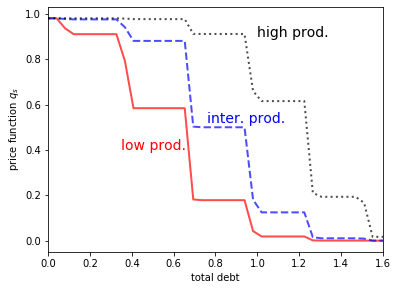

In [147]:
# qs as a function of total debt
fig, ax = plt.subplots(figsize=(6,4.5))

iz_low = 30
iz_median = 50
iz_high = 80

ir_median = 5
ik_median = 5
if_median = 1


B_xaxis = [] # x-axis is grids of b
qs_yaxis_l = []
qs_yaxis_m = []
qs_yaxis_h = []
for iB in range(np.size(Bgrid)):
    B_xaxis.append(Bgrid[iB])
    qs_yaxis_l.append(qs[iz_low, ik_median, ir_median, iB, if_median])  
    qs_yaxis_m.append(qs[iz_median, ik_median, ir_median, iB, if_median])   
    qs_yaxis_h.append(qs[iz_high, ik_median, ir_median, iB, if_median])  
    
    
ax.plot(B_xaxis, qs_yaxis_l, linestyle = '-',color='red',lw=2, alpha=0.7)
ax.plot(B_xaxis, qs_yaxis_m, linestyle = '--', color='blue', lw=2, alpha=0.7)
ax.plot(B_xaxis, qs_yaxis_h, linestyle = ':', color='black', lw=2, alpha=0.7)
ax.annotate("low prod.",color='red', xy=(0.35,0.4),xytext=(0.35,0.4), fontsize = 14)
ax.annotate("inter. prod.",color='blue', xy=(0.76, 0.52),xytext=(0.76, 0.52), fontsize = 14)
ax.annotate("high prod.",color='black', xy=(1, 0.9),xytext=(1, 0.9), fontsize = 14)


ax.set_xlabel('total debt')
ax.set_ylabel('price function $q_s$')
plt.xlim([0, 1.6])
plt.savefig('qs(B)_diffz.pdf')

plt.show()



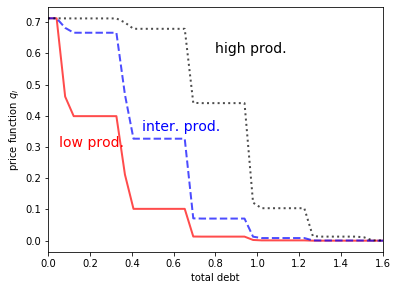

In [148]:
# ql as a function of total debt
fig, ax = plt.subplots(figsize=(6,4.5))

iz_low = 30
iz_median = 50
iz_high = 80

ir_median = 5
ik_median = 5
if_median = 1


B_xaxis = [] # x-axis is grids of b
ql_yaxis_l = []
ql_yaxis_m = []
ql_yaxis_h = []
for iB in range(np.size(Bgrid)):
    B_xaxis.append(Bgrid[iB])
    ql_yaxis_l.append(ql[iz_low, ik_median, ir_median, iB, if_median])  
    ql_yaxis_m.append(ql[iz_median, ik_median, ir_median, iB, if_median])   
    ql_yaxis_h.append(ql[iz_high, ik_median, ir_median, iB, if_median])  
    
    
ax.plot(B_xaxis, ql_yaxis_l, linestyle = '-',color='red',lw=2, alpha=0.7)
ax.plot(B_xaxis, ql_yaxis_m, linestyle = '--', color='blue', lw=2, alpha=0.7)
ax.plot(B_xaxis, ql_yaxis_h, linestyle = ':', color='black', lw=2, alpha=0.7)
ax.annotate("low prod.",color='red', xy=(0.05,0.3),xytext=(0.05,0.3), fontsize = 14)
ax.annotate("inter. prod.",color='blue', xy=(0.45, 0.35),xytext=(0.45, 0.35), fontsize = 14)
ax.annotate("high prod.",color='black', xy=(0.8, 0.6),xytext=(0.8, 0.6), fontsize = 14)


ax.set_xlabel('total debt')
ax.set_ylabel('price function $q_l$')
plt.xlim([0, 1.6])
plt.savefig('ql(B)_diffz.pdf')

plt.show()

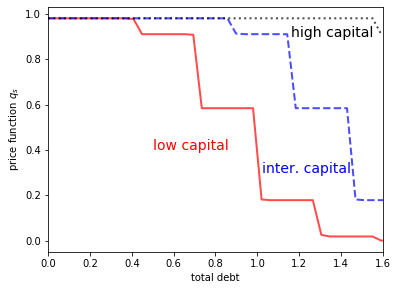

In [8]:
# qs as a function of total debt, for different k
fig, ax = plt.subplots(figsize=(6,4.5))

iz_median = 30
ir_median = 5
ik_low = 7
ik_median = 10
ik_high = 15
if_median = 1


B_xaxis = [] # x-axis is grids of b
qs_yaxis_l = []
qs_yaxis_m = []
qs_yaxis_h = []
for iB in range(np.size(Bgrid)):
    B_xaxis.append(Bgrid[iB])
    qs_yaxis_l.append(qs[iz_median, ik_low, ir_median, iB, if_median])  
    qs_yaxis_m.append(qs[iz_median, ik_median, ir_median, iB, if_median])   
    qs_yaxis_h.append(qs[iz_median, ik_high, ir_median, iB, if_median])  
    
    
ax.plot(B_xaxis, qs_yaxis_l, linestyle = '-',color='red',lw=2, alpha=0.7)
ax.plot(B_xaxis, qs_yaxis_m, linestyle = '--', color='blue', lw=2, alpha=0.7)
ax.plot(B_xaxis, qs_yaxis_h, linestyle = ':', color='black', lw=2, alpha=0.7)
ax.annotate("low capital",color='red', xy=(0.5,0.4),xytext=(0.5,0.4), fontsize = 14)
ax.annotate("inter. capital",color='blue', xy=(1.02, 0.3),xytext=(1.02, 0.3), fontsize = 14)
ax.annotate("high capital",color='black', xy=(1.16, 0.9),xytext=(1.16, 0.9), fontsize = 14)


ax.set_xlabel('total debt')
ax.set_ylabel('price function $q_s$')
plt.xlim([0, 1.6])

plt.savefig('qs(B)_diffk.pdf')

plt.show()


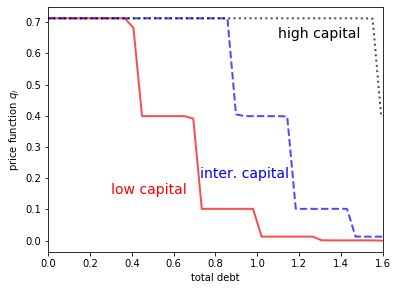

In [9]:
# ql as a function of total debt, for different k
fig, ax = plt.subplots(figsize=(6,4.5))

iz_median = 30
ir_median = 5
ik_low = 7
ik_median = 10
ik_high = 15
if_median = 1

B_xaxis = [] # x-axis is grids of b
ql_yaxis_l = []
ql_yaxis_m = []
ql_yaxis_h = []
for iB in range(np.size(Bgrid)):
    B_xaxis.append(Bgrid[iB])
    ql_yaxis_l.append(ql[iz_median, ik_low, ir_median, iB, if_median])  
    ql_yaxis_m.append(ql[iz_median, ik_median, ir_median, iB, if_median])   
    ql_yaxis_h.append(ql[iz_median, ik_high, ir_median, iB, if_median])  
    
    
ax.plot(B_xaxis, ql_yaxis_l, linestyle = '-',color='red',lw=2, alpha=0.7)
ax.plot(B_xaxis, ql_yaxis_m, linestyle = '--', color='blue', lw=2, alpha=0.7)
ax.plot(B_xaxis, ql_yaxis_h, linestyle = ':', color='black', lw=2, alpha=0.7)
ax.annotate("low capital",color='red', xy=(0.3,0.15),xytext=(0.3,0.15), fontsize = 14)
ax.annotate("inter. capital",color='blue', xy=(0.725, 0.2),xytext=(0.725, 0.2), fontsize = 14)
ax.annotate("high capital",color='black', xy=(1.1, 0.65),xytext=(1.1, 0.65), fontsize = 14)


ax.set_xlabel('total debt')
ax.set_ylabel('price function $q_l$')
plt.xlim([0, 1.6])
# plt.ylim([0.2, 0.5])
# plt.xticks(np.arange(0.9, 1.1, 0.05))
plt.savefig('ql(B)_diffk.pdf')

plt.show()